# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

## Question 1: Part 1

In [4]:
import pandas as pd
import numpy as np 

df = pd.read_csv("airbnb_NYC.csv", encoding="cp1252")
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
# The Price column is a string with commas in the thousands 
print(df['Price'].head())
print(df['Price'].dtype)

0    145
1     37
2     28
3    199
4    549
Name: Price, dtype: str
str


In [ ]:
# Convert the Price column to a float by removing the commas
df['Price_clean'] = (df['Price'].astype(str).str.replace(",", "", regex=False).astype(float))
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Price_clean
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,145.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,37.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,28.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,199.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,549.0


In [ ]:
# Check for missing values in the cleaned Price column
df['Price_clean'].isna().sum()

np.int64(0)

## Part 2

In [11]:
df = pd.read_csv("mn_police_use_of_force.csv")
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [ ]:
# Check how many times each value appears in the column
df['subject_injury'].value_counts(dropna=False)

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64

In [ ]:
# Shows the proportion of missing values in the column (76%)
prop_missing = df['subject_injury'].isna().mean()
prop_missing

np.float64(0.7619342359767892)

In [ ]:
# Shows missing values in the force type
# Missing subject_injury values occur most often with bodily force, chemical irritants, and taser use.
# Shows that injury status is more consistently recorded when severe or highly liable force is used (like firearms)
# Injury status is less consistently recorded when injuries are less severe or even common (like bodily force)

df['subject_injury_clean'] = df["subject_injury"]

pd.crosstab(
    df['subject_injury_clean'],
    df['force_type'], 
    dropna=False
)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


In [ ]:
# Replace n/a values with 'Missing'
df['subject_injury_clean'] = df['subject_injury_clean'].fillna('Missing')
df['subject_injury_clean'].value_counts()

subject_injury_clean
Missing    9848
Yes        1631
No         1446
Name: count, dtype: int64

## Part 3

In [27]:
df = pd.read_csv("metabric.csv")
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [28]:
df["Overall Survival Status"].value_counts(dropna=False)

Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64

In [ ]:
# Assigns 1 to living patients and 0 to deceased patients in new binary column
df["overall_survival_binary"] = df["Overall Survival Status"].map(
    {
        "0:LIVING": 1,
        "1:DECEASED": 0
    }
)
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,overall_survival_binary
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0,1
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0,0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0,1
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0,0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0,0


## Part 4

In [33]:
df = pd.read_csv("airbnb_NYC.csv", encoding="cp1252")
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [36]:
df['Review Scores Rating'].isna().sum()

np.int64(8323)

In [ ]:
# Ignores missing values and finds median review score
median_score = df['Review Scores Rating'].median()
median_score

np.float64(94.0)

In [41]:
# Imputes missing review scores with the median score
df['Review Scores Rating_imputed'] = (
    df['Review Scores Rating'].fillna(median_score)
)
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Review Scores Rating_imputed
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,96.0


In [ ]:
# 0 missing values remain
# All missing values have been replaced with the same number (94). This clusters observations at the median and understates true variation in review scores.
# It also assumes that all missing reviews are average, which is often false.
# Median imputations can bias estimates toward the center and weaken real relationships between variables.

df['Review Scores Rating_imputed'].isna().sum()

np.int64(0)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

## Question 2: Part 1

In [ ]:
# Download and instal xlrd package to read xls, excel file
!python -m pip install --upgrade xlrd
df = pd.read_excel("GSAF5.xls")
df.head()



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: pip install --upgrade pip


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Part 2

In [ ]:
# Shows columns with >95% missing values
missing_prop = df.isna().mean()
missing_prop[missing_prop > 0.95]

Unnamed: 21    0.999859
Unnamed: 22    0.999717
dtype: float64

In [58]:
# Drop columns with >95% missing values
df = df.drop(columns=['Unnamed: 21', "Unnamed: 22"])

## Part 3

- In this dataset, I would say an observation is one where there is one row that shows one recorded case, a single event, with one subject. I believe this is the correct 'observation' because a row contains a bundle of attributes that belong together as one record. For example, Sex + Age (of the subject), Species (of the shark), and Source (to the documentation). Columns like Case Number also suggest that the data is indexing events, not individual measurements over time. 
- This will effect my cleaning because I am not simply going to count rows as "number of incidents"; I am going to check the uniqueness (like by Case Number). If one Case Number appears multiple times this may show duplicate rows, multiple links for the same events/multiple entries. Missing-ness could also just mean that the case record didn't record that detail (an unknown age/species) not that it just didn't exist.

## Part 4

In [ ]:
# Cleans Year column by converting to numeric and setting negative years to NaN
# Checked the dataset and multiple rows are listed with the year '0000'
df['Year_clean'] = pd.to_numeric(df['Year'], errors='coerce')

df.loc[df['Year_clean'] < 0, 'Year_clean'] = np.nan

In [73]:
# Filters the clean Year column for years 1940 and later
df_1940 = df[df['Year_clean'] >= 1940]

<Axes: title={'center': 'Shark Attacks per Year (1940 and Later)'}, xlabel='Year_clean'>

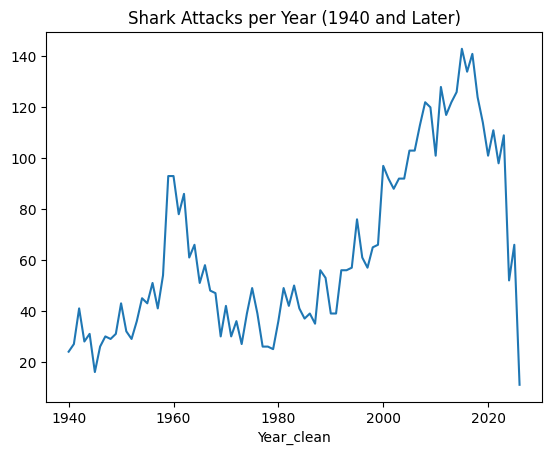

In [ ]:
# line plot shows that shark attacks spiked between 1980-2015 (with some ups and downs) and a sharp decrease around 2015
attacks_per_year = df_1940['Year_clean'].value_counts().sort_index()
attacks_per_year.plot.line(title="Shark Attacks per Year (1940 and Later)")

## Part 5

In [75]:
df['Age_clean'] = pd.to_numeric(df['Age'], errors='coerce')

In [78]:
# Isolating implausible ages and setting them to NaN
df.loc[(df['Age_clean'] < 0 ) | (df['Age_clean'] > 100), 'Age_clean'] = np.nan

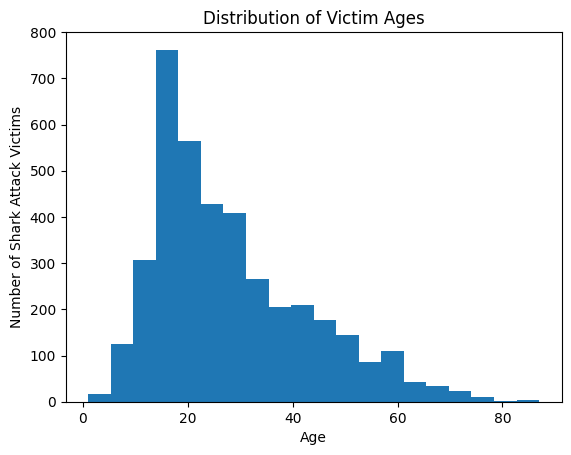

In [79]:
import matplotlib.pyplot as plt 

plt.hist(df['Age_clean'].dropna(), bins=20)
plt.xlabel("Age")
plt.ylabel("Number of Shark Attack Victims")
plt.title("Distribution of Victim Ages")
plt.show()

## Part 6

In [80]:
df['Type'].value_counts(dropna=False)

Type
Unprovoked             5224
Provoked                642
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             26
NaN                      18
Boat                      7
 Provoked                 2
unprovoked                1
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [81]:
# Standardize the text and capitalize
df['Type_clean'] = df['Type'].str.strip().str.capitalize()
# Narrow down the Type_clean column to provoked, unprovoked, or unknown
df['Type_clean'] = df['Type_clean'].where(df['Type_clean'].isin(['Provoked', 'Unprovoked']), 'Unknown')

In [ ]:
# Check there are only three values in the cleaned Type column
df['Type_clean'].value_counts()

Type_clean
Unprovoked    5225
Unknown       1204
Provoked       644
Name: count, dtype: int64

In [83]:
# Proportion of unprovoked shark attacks among all attacks 
prop_unprovoked = (df['Type_clean'] == 'Unprovoked').mean()
prop_unprovoked * 100

np.float64(73.87247278382581)

## Part 7

In [87]:
df["Fatal Y/N"].value_counts(dropna=False)

Fatal Y/N
N          4932
Y          1488
NaN         561
UNKNOWN      71
 N            7
F             5
M             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

In [ ]:
# Standardize the text
df["Fatal_clean"] = df["Fatal Y/N"].str.strip().str.upper()

In [ ]:
# Narrow down the Fatal_clean column to Y, N, or Unknown
df["Fatal_clean"] = df["Fatal_clean"].where(
    df["Fatal_clean"].isin(["Y", "N"]),
    "Unknown"
)

In [ ]:
# Check value counts
df["Fatal_clean"].value_counts()

Fatal_clean
N          4941
Y          1489
Unknown     643
Name: count, dtype: int64

## Part 8

In [ ]:
# Shows that attacks are more likely to be fatal when they are unprovoked than when they are provoked. 
# This could be because unprovoked attacks are often a surprise, maybe with larger sharks and more severe bites. Provoked attacks are more likely to occur during human-initiated interactions that result in defense.
pd.crosstab(
    df["Type_clean"],
    df["Fatal_clean"],
    normalize="index"
)

Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.953416,0.013975,0.032609
Unknown,0.372924,0.460963,0.166113
Unprovoked,0.742201,0.015120,0.242679


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

## Question 3: Part 1

- This paper is about tidy data and how efficient tidy datasets are to read, manipulate, model, and visualize. The abstract states that it is also easy to create tidy datasets (the paper probably goes into detail about how to create tidy datasets)

## Part 2

- The 'tidy data standard' is meant to make data analysis easier and more efficient by providing a universal, principled way to structure data that supports exploration, modeling, and visualization without constant restructuring.

## Part 3

- The statement "Like families, tidy datasets are all alike but every messy dataset is messy in its own way" means that tidy data follow a single, standardized structure, while messy data can violate that structure in many different and unpredictable ways. The second sentence emphasizes that although identifying observations and variables is usually straightforward within a specific dataset, it is difficult to define them universally because their meaning depends on the analytical context and goals of the study. 

## Part 4

- Wickham defines values as the actual, measured entries in the dataset, representing concrete pieces of information such as numbers or strings. Variables are defined as the attributes/characteristics being measured across observations, and each variable contains a set of values describing the same type of information (like age, height, or species). Observations are the individual units being studied, formed by the collection of values across all variables for a single case/entity. In a tidy dataset, each variable is stored in its own column, each observation occupies its own row, and each value is stored in a single cell.

## Part 5

- Wickham defines tidy data as a standardized way of organizing datasets such that each variable forms a column, each observation forms a row, and each value occupies a single cell. This structure ensures that variables, observations, and values are clearly separated and consistently represented, making data easier to manipulate, analyze, and visualize. 

## Part 6

The five most common problems with messy datasets are: 
1. Column headers are values rather than variable names (what should be data values are encoded in column names). 
2. Multiple variables are stored in a single column (impossible to analyze them one by one). 
3. Variables are stored in both rows and columns (violated tidy data rule that variables belong only in columns).
4. Multiple types of observational units are stored in the sam table (mixing distinct entities that should be separated)
5. A single observational unit is stored across multiple tables (forcing unnecessary joins before analysis)

## Part 7

- Table 11 is messy because it violated the tidy data principle that variables should be columns and values should be cells. In Table 11, values of a single variable are spread across multiple columns (what should be data values are in the column structure). 
- Table 12 is tidy and "molten" because the data have been restructured so that each variable forms its own column, each observation its own row, and each value has a single cell. Through the process of melting, messy Table 11 is transformed into a long format by collapsing multiple columns into two (one identifies the variables as headers and the other has corresponding values). This follows the "tidy data principles."

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

## Question 4: Part 1

In [92]:
df = pd.read_csv("ForeignGifts_edu.csv")
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


## Part 2

In [ ]:
df['Foreign Gift Amount'].describe()

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

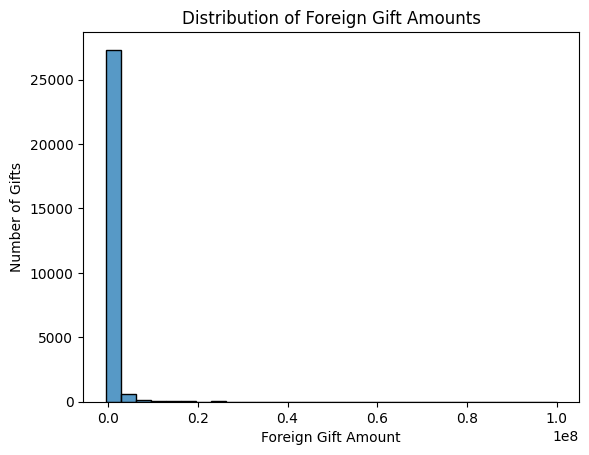

In [ ]:
# Histogram of Foreign Gift Amounts (without alterations)
sns.histplot(df['Foreign Gift Amount'].dropna(), bins=30)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Number of Gifts")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

/Users/madiheath/Documents/spring26/machine_learning/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/madiheath/Documents/spring26/machine_learning/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


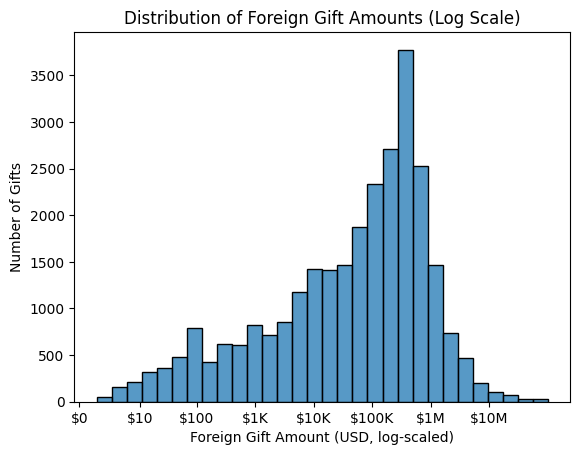

In [ ]:
import seaborn as sns
import numpy as np

# Choosing tick values and locations for log-scaled x-axis (so the ticks are more interpretable)
tick_vals = [0, 10, 100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]
tick_locs = np.log1p(tick_vals)

# Plotting histogram with log-scaled x-axis because of extreme right skew without log scale
sns.histplot(np.log1p(df["Foreign Gift Amount"]), bins=30)

plt.xticks(tick_locs, 
           ["$0", "$10", "$100", "$1K", "$10K", "$100K", "$1M", "$10M"])

plt.xlabel("Foreign Gift Amount (USD, log-scaled)")
plt.ylabel("Number of Gifts")
plt.title("Distribution of Foreign Gift Amounts (Log Scale)")
plt.show()

- I found, from the original histogram that I made, that the foreign gift amounts are heavily skewed to the right. This is because the x-values are in scientific notation (the numbers are very very big). This makes sense because people are spending a relatively normal amount of money on gifts (not hundreds of millions of dollars), so the graph is skewed toward zero. Because of this, I took the log of the values and set the x-ticks to a readable number. This new graph is enlarges the distribution so one can actually see how much money is being spent on foreign gifts.

## Part 3

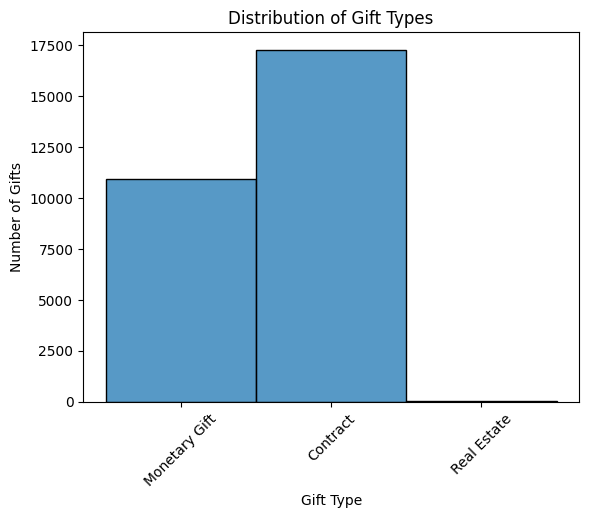

In [109]:
sns.histplot(df['Gift Type'])
plt.xlabel("Gift Type")
plt.ylabel("Number of Gifts")
plt.title("Distribution of Gift Types")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Most common gifts are contracts and monetary gifts, real estate gifts are significantly less common
df['Gift Type'].value_counts()

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

## Part 4

In [113]:
# Shows the top 15 most common countries of giftors

top_15_count = df['Country of Giftor'].value_counts().head(15)
top_15_count

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

In [114]:
# Shows the top 15 countries that contributed the most in total gift amount 
top_15_amount = (df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))
top_15_amount

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

## Part 5

In [117]:
top_15_inst = (
    df.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

top_15_inst

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

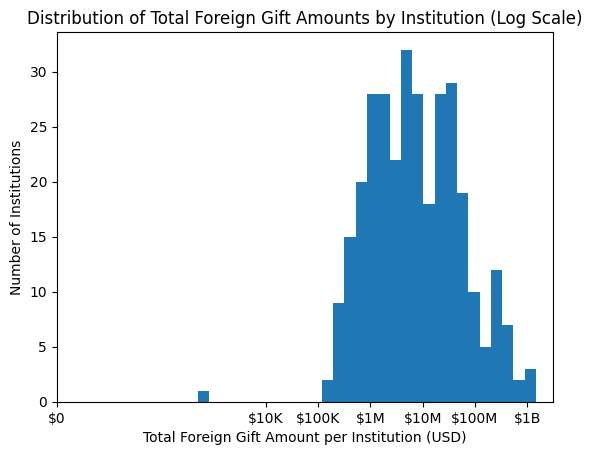

In [125]:
institution_totals = (
    df.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
)

# Histogram (log-transformed totals)
plt.hist(np.log1p(institution_totals), bins=30)

# Choose meaningful dollar amounts
tick_vals = [0, 10_000, 100_000, 1_000_000, 10_000_000, 100_000_000, 1_000_000_000]

# Convert to log scale locations
tick_locs = np.log1p(tick_vals)

# Set ticks + readable labels
plt.xticks(
    tick_locs,
    ["$0", "$10K", "$100K", "$1M", "$10M", "$100M", "$1B"]
)

plt.xlabel("Total Foreign Gift Amount per Institution (USD)")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gift Amounts by Institution (Log Scale)")
plt.show()


## Part 6

In [126]:
top_giftors = (df.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))
top_giftors

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

## Question 5: Part 1

In [127]:
df = pd.read_csv("college_completion.csv")
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


## Part 2

In [ ]:
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
# There are 3798 observations (rows) and 63 variables (columns)
df.shape

(3798, 63)

## Part 3

In [ ]:
# There are more likely to be 2 year public institutions than 4 year
# There are much more 4 year private not for profit institutions than 2 year
# Private for profit are about the same for 2 year and 4 year institutions
pd.crosstab(df['control'], df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


## Part 4

<Axes: xlabel='grad_100_value', ylabel='Density'>

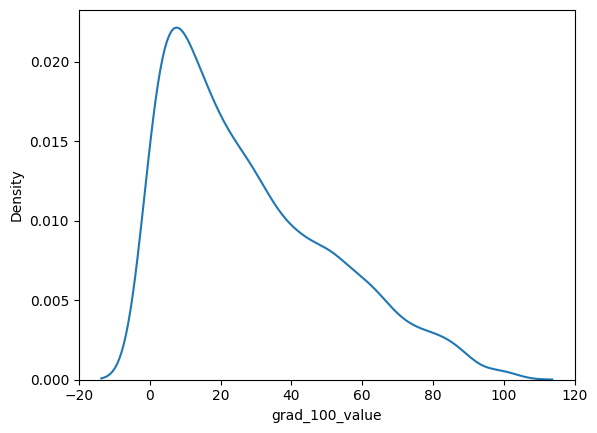

In [ ]:
# kde plot of grad_100_value
sns.kdeplot(df['grad_100_value'])

In [134]:
df['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

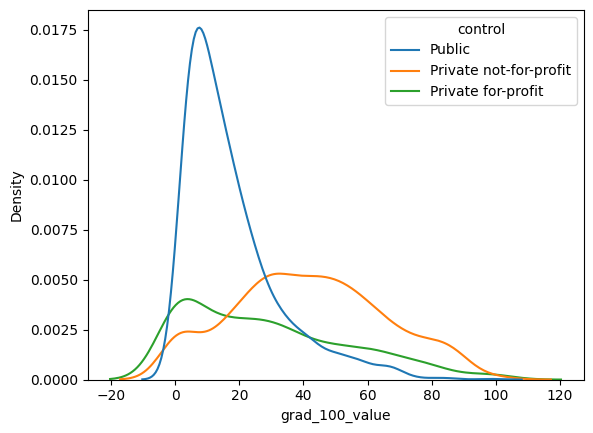

In [135]:
sns.kdeplot(df, x='grad_100_value', hue='control')

In [ ]:
# Private not for profit institutions appear to have the most favorable graduation rates, followed by public institutions, with private for profit institutions having the lowest graduation rates.
df.groupby('control')['grad_100_value'].describe() 

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


## Part 5

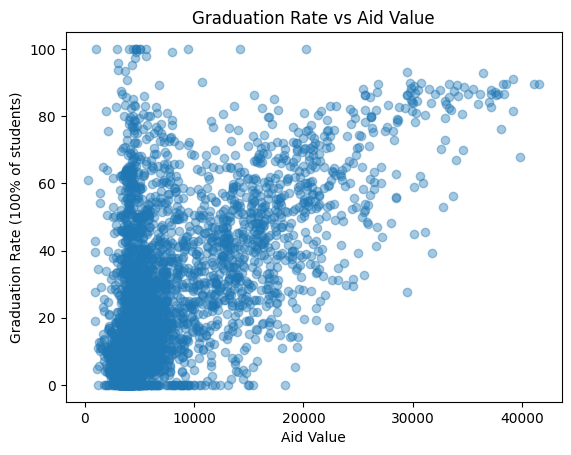

In [138]:
plt.scatter(df['aid_value'], df['grad_100_value'], alpha=0.4)
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate (100% of students)")
plt.title("Graduation Rate vs Aid Value")
plt.show()

In [139]:
# Covariance and Correlation
df[['aid_value', 'grad_100_value']].cov()
df[['aid_value', 'grad_100_value']].corr()

,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


- The scatterplot shows moderate positive relationship between aid value and graduation rate. Institutions that provide higher levels o financial aid tend to have higher graduation rates; however, there is substantial variability (especially at lower aid levels)
- The covariance is positive indicating that aid value and graduation rate move in teh same direction
- The correlation is 0.58, which shows a moderate positive linear association between the variables.

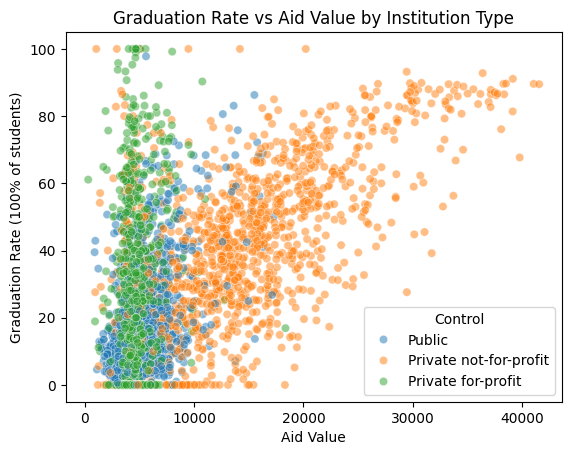

In [141]:
sns.scatterplot(df, x='aid_value', y='grad_100_value', hue='control', alpha = 0.5)
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate (100% of students)")
plt.title("Graduation Rate vs Aid Value by Institution Type")
plt.legend(title='Control')
plt.show()

- When you condition on control, private not for profit institutions show a clear positive relationship between aid value and graduation rates. Public and private for profit institutions show much weaker relationships, with graduation rates remaining relatively low across the amount of aid. Because of this, aid appears to vary positively with graduation rates mainly for private not for profit institutions. 

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

![Q6 Answer](Q6ML.jpg)

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

## Question 7: Part 1

In [5]:
# I think you meant ames_prices.csv
df = pd.read_csv("ames_prices.csv")
df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


## Part 2

<Axes: xlabel='price', ylabel='Density'>

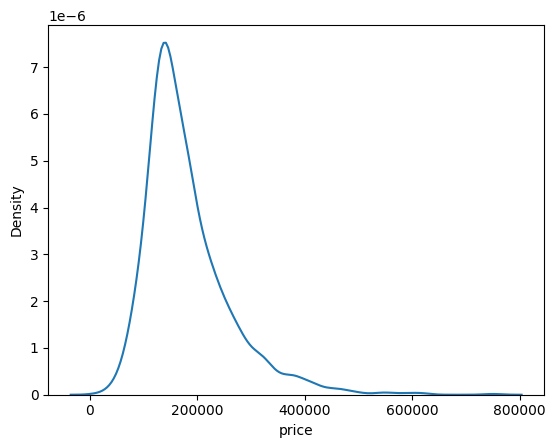

In [144]:
sns.kdeplot(df['price'])

In [145]:
df['price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

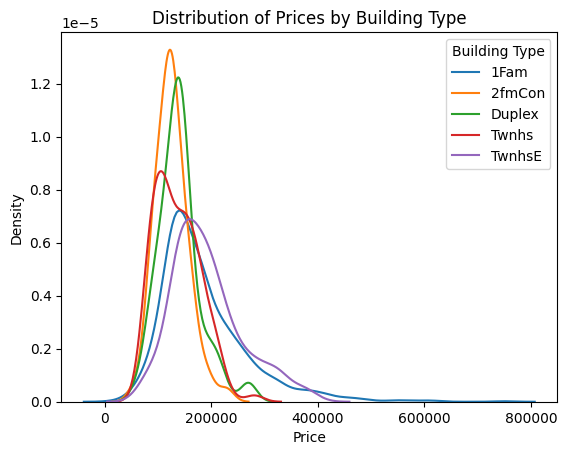

In [146]:
for bldg_type, group in df.groupby('Bldg.Type'): 
    sns.kdeplot(
        group['price'], 
        label=bldg_type, 
        common_norm=False
    )

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Prices by Building Type')
plt.legend(title='Building Type')
plt.show()

- The most expensive homes are 1 family houses, and they also have the highest variation in transaction prices. Townhouses and two-family conversions are generally cheaper with less variation in prices

## Part 3

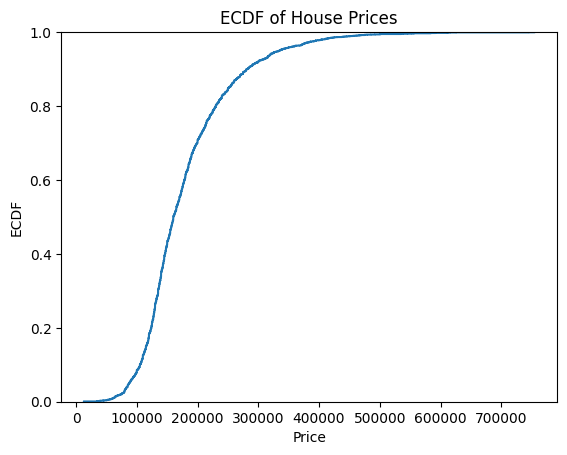

In [147]:
sns.ecdfplot(df, x='price')
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.title('ECDF of House Prices')
plt.show()

In [148]:
df['price'].describe()[['min', '25%', '50%', '75%', 'max']]

min     12789.0
25%    129500.0
50%    160000.0
75%    213500.0
max    755000.0
Name: price, dtype: float64

## Part 4

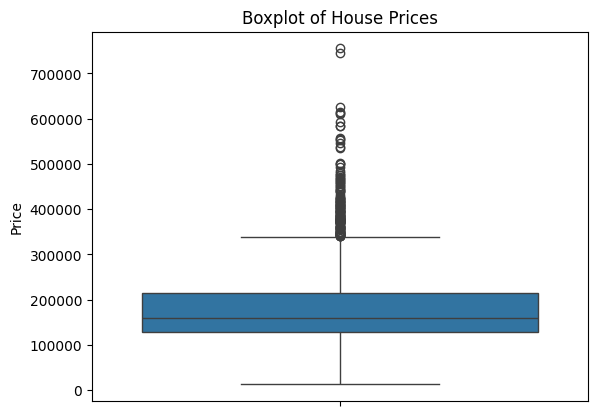

In [ ]:
# The outliers of this graph are a couple houses with extremely high prices (700000+)
import seaborn as sns
from matplotlib import pyplot as plt

sns.boxplot(y=df['price'])
plt.title("Boxplot of House Prices")
plt.ylabel("Price") 
plt.show()


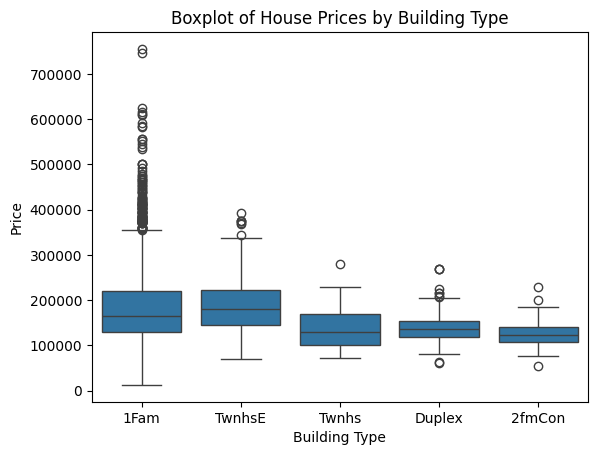

In [ ]:
# Some patterns are that single family homes tend to have higher prices. They also have the largest IQR (most outliers too)
# Townhomes have more consistent pricing with a smaller IQR and fewer outliers.
# Duplexes and two family homes tend to have lower prices overall with less variability.
sns.boxplot(df, x='Bldg.Type', y='price')
plt.xlabel('Building Type')
plt.ylabel('Price')
plt.title('Boxplot of House Prices by Building Type')
plt.show()

## Part 5

In [11]:
# Compute quartiles
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)

# Compute IQR range
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Dummy variable: 1 = outlier, 0 = not outlier
df["price_outlier"] = ((df["price"] < lower_bound) | 
                        (df["price"] > upper_bound)).astype(int)

# How many outliers
df["price_outlier"].value_counts()

price_outlier
0    2793
1     137
Name: count, dtype: int64

## Part 6

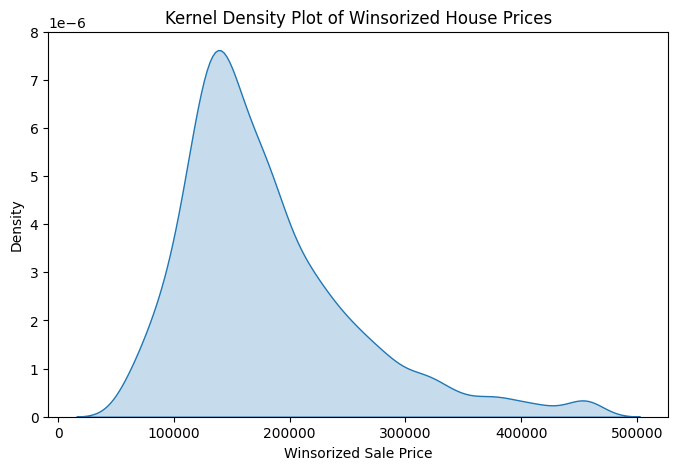

In [ ]:
# Compute winsorization cutoffs
lower = df["price"].quantile(0.01)
upper = df["price"].quantile(0.99)

# Winsorize price
df["price_winsor"] = df["price"].clip(lower=lower, upper=upper)

# KDE plot of winsorized prices
plt.figure(figsize=(8, 5))
sns.kdeplot(df["price_winsor"], fill=True)
plt.title("Kernel Density Plot of Winsorized House Prices")
plt.xlabel("Winsorized Sale Price")
plt.show()

In [14]:
# Describe table of winsorized prices
df["price_winsor"].describe()

count      2930.000000
mean     180091.154334
std       75842.579174
min       61756.070000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      456666.370000
Name: price_winsor, dtype: float64

The winsorized plot is less right-skewed compared to the original, and does not have such a long right tail (that extends to higher building prices). This KDE in general is smoother and more concentrated with the bulk of the density centered around more typical house prices.